<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Скачивание-файлов-с-облака" data-toc-modified-id="Скачивание-файлов-с-облака-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Скачивание файлов с облака</a></span></li><li><span><a href="#Создание-базы-sqlite." data-toc-modified-id="Создание-базы-sqlite.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Создание базы sqlite.</a></span></li></ul></li><li><span><a href="#Анализ-полученных-данных" data-toc-modified-id="Анализ-полученных-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ полученных данных</a></span><ul class="toc-item"><li><span><a href="#RFM-анализ" data-toc-modified-id="RFM-анализ-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>RFM-анализ</a></span></li><li><span><a href="#Когортный-анализ" data-toc-modified-id="Когортный-анализ-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Когортный анализ</a></span></li></ul></li><li><span><a href="#Дашборд-в-Yandex-datalens" data-toc-modified-id="Дашборд-в-Yandex-datalens-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Дашборд в Yandex datalens</a></span></li></ul></div>

# АиФ Доброе сердце

## Подготовка данных

### Скачивание файлов с облака

In [ ]:
#Устанавливаем модуль для работы с фалами из яндекс диска
!pip install yadisk

In [15]:
#Импортируем библиотеки для работы с локальными файлами и авторизуем токен для получения данных из облака
import yadisk
import pandas as pd
import sys
import os
from tqdm import tqdm

# Используем сохранённый токен
y = yadisk.YaDisk(token="")

# Проверим доступ
if y.check_token():
    print("Успешная авторизация")
else:
    print("Ошибка авторизации")



Успешная авторизация


In [3]:
#Получем информацию о файлах в облаке
y.get_disk_info()

<DiskInfoObject{'paid_max_file_size': 53687091200, 'max_file_size': 53687091200, 'total_space': 1112396529664, 'trash_size': 0, 'used_space': 941383190, 'is_paid': True, 'is_idm_managed_folder_address_access': False, 'reg_time': datetime.datetime(2013, 3, 22, 3, 4, 45, tzinfo=datetime.timezone.utc), 'system_folders': <SystemFoldersObject{'odnoklassniki': 'disk:/Социальные сети/Одноклассники', 'google': 'disk:/Социальные сети/Google+', 'instagram': 'disk:/Социальные сети/Instagram', 'vkontakte': 'disk:/Социальные сети/ВКонтакте', 'attach': 'disk:/Почтовые вложения', 'mailru': 'disk:/Социальные сети/Мой Мир', 'downloads': 'disk:/Загрузки/', 'applications': 'disk:/Приложения', 'facebook': 'disk:/Социальные сети/Facebook', 'social': 'disk:/Социальные сети/', 'messenger': 'disk:/Файлы Мессенджера', 'calendar': 'disk:/Материалы встреч', 'photostream': 'disk:/Фотокамера/', 'screenshots': 'disk:/Скриншоты/', 'scans': 'disk:/Сканы'}>, 'user': <UserObject{'reg_time': datetime.datetime(2013, 3, 2

In [5]:
#Получим путь файлов на диске
list_of_files = []
for el in list(y.listdir('Мастерская/Действия')):
    if el['path'].endswith('.csv'):
        list_of_files.append(el['path'])
list_of_files

['disk:/Мастерская/Действия/1 of 4 - Dobroaif - 04.09.2024 - 41884 - 9b4daafd-72bb-4951-b6fd-0d09eaf37387.csv',
 'disk:/Мастерская/Действия/2 of 4 - Dobroaif - 04.09.2024 - 41884 - 9b4daafd-72bb-4951-b6fd-0d09eaf37387.csv',
 'disk:/Мастерская/Действия/3 of 4 - Dobroaif - 04.09.2024 - 41884 - 9b4daafd-72bb-4951-b6fd-0d09eaf37387.csv',
 'disk:/Мастерская/Действия/4 of 4 - Dobroaif - 04.09.2024 - 41884 - 9b4daafd-72bb-4951-b6fd-0d09eaf37387.csv']

In [7]:
#Укажем загрузочный путь для файлов
load_path = '/Users/one/Desktop/ya/Actions'
if not os.path.exists(load_path):
    os.mkdir(load_path)
os.chdir(load_path)

In [9]:
#Загрузим файлы
for file in tqdm(list_of_files):
    y.download(file.split(':')[1], file.split('/')[-1])

100%|█████████████████████████████████████████████| 4/4 [01:24<00:00, 21.24s/it]


In [9]:
# Посмотрим на загруженные файлы в рабочей директории
os.listdir()

['3 of 4 - Dobroaif - 04.09.2024 - 41884 - 9b4daafd-72bb-4951-b6fd-0d09eaf37387.csv',
 '1 of 4 - Dobroaif - 04.09.2024 - 41884 - 9b4daafd-72bb-4951-b6fd-0d09eaf37387.csv',
 '2 of 4 - Dobroaif - 04.09.2024 - 41884 - 9b4daafd-72bb-4951-b6fd-0d09eaf37387.csv',
 '4 of 4 - Dobroaif - 04.09.2024 - 41884 - 9b4daafd-72bb-4951-b6fd-0d09eaf37387.csv']

In [11]:
# Создадим список датафреймов из файлов csv
list_of_files = [file for file in os.listdir() if file.endswith('.csv')]
list_of_df = []
for file in tqdm(list_of_files):
    df = pd.read_csv(file, sep=';', on_bad_lines='skip') 
    list_of_df.append(df)

  0%|                                                     | 0/4 [00:00<?, ?it/s]/var/folders/zm/6kjjd4sn4xnc1chc43s110sw0000gn/T/ipykernel_97850/101796364.py:6: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, sep=';', on_bad_lines='skip')
 50%|██████████████████████▌                      | 2/4 [00:04<00:04,  2.04s/it]/var/folders/zm/6kjjd4sn4xnc1chc43s110sw0000gn/T/ipykernel_97850/101796364.py:6: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, sep=';', on_bad_lines='skip')
100%|█████████████████████████████████████████████| 4/4 [00:07<00:00,  1.97s/it]


In [13]:
# Проверим корректность данных в списке
list_of_df[1].columns

Index(['CustomerActionIdsMindboxId',
       'CustomerActionActionTemplateIdsSystemName',
       'CustomerActionActionTemplateName', 'CustomerActionDateTimeUtc',
       'CustomerActionCreationDateTimeUtc', 'CustomerActionBrandIdsSystemName',
       'CustomerActionChannelIdsMindboxId', 'CustomerActionChannelName',
       'CustomerActionChannelIdsExternalId',
       'CustomerActionChannelIdsSystemName',
       'CustomerActionChannelUtmCampaign', 'CustomerActionChannelUtmSource',
       'CustomerActionChannelUtmMedium', 'CustomerActionChannelUtmContent',
       'CustomerActionChannelUtmTerm', 'CustomerActionCustomerIdsBackendID',
       'CustomerActionCustomerIdsWebsiteID',
       'CustomerActionCustomerIdsMindboxId'],
      dtype='object')

In [15]:
# Объединим список датафреймов в один датафрейм 
df_actions = pd.concat(list_of_df)
df_actions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3834751 entries, 0 to 825052
Data columns (total 18 columns):
 #   Column                                     Dtype  
---  ------                                     -----  
 0   CustomerActionIdsMindboxId                 int64  
 1   CustomerActionActionTemplateIdsSystemName  object 
 2   CustomerActionActionTemplateName           object 
 3   CustomerActionDateTimeUtc                  object 
 4   CustomerActionCreationDateTimeUtc          object 
 5   CustomerActionBrandIdsSystemName           object 
 6   CustomerActionChannelIdsMindboxId          int64  
 7   CustomerActionChannelName                  object 
 8   CustomerActionChannelIdsExternalId         object 
 9   CustomerActionChannelIdsSystemName         object 
 10  CustomerActionChannelUtmCampaign           object 
 11  CustomerActionChannelUtmSource             object 
 12  CustomerActionChannelUtmMedium             object 
 13  CustomerActionChannelUtmContent            objec

Загрузим следующий датафрейм с заказами.

In [17]:
#Формируем список путей к файлам с заказами
list_of_files_orders = []
for el in list(y.listdir('Мастерская/Заказы')):
    if el['path'].endswith('.csv'):
        list_of_files_orders.append(el['path'])
list_of_files_orders

['disk:/Мастерская/Заказы/Заказы.csv']

In [21]:
#Указываем путь
load_path = ''
if not os.path.exists(load_path):
    os.mkdir(load_path)
os.chdir(load_path)

In [27]:
#Загружаем датафрейм
for file in tqdm(list_of_files_orders):
    y.download(file.split(':')[1], file.split('/')[-1])

100%|█████████████████████████████████████████████| 1/1 [00:03<00:00,  3.17s/it]


In [23]:
#Смотрим на список файлов в рабочей директории
os.listdir()

['Заказы.csv']

In [25]:
#Сделаем датафрейм для заказов 
for file in os.listdir():
    if file.endswith('.csv'):
        orders_file = file
        break
        
df_orders = pd.read_csv(orders_file, sep=';', on_bad_lines='skip')

df_orders.head()

/var/folders/zm/6kjjd4sn4xnc1chc43s110sw0000gn/T/ipykernel_97850/2213675164.py:7: DtypeWarning: Columns (11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_orders = pd.read_csv(orders_file, sep=';', on_bad_lines='skip')


,OrderIdsMindboxId,OrderFirstActionIdsMindboxId,OrderFirstActionDateTimeUtc,OrderFirstActionChannelIdsMindboxId,OrderFirstActionChannelIdsExternalId,OrderFirstActionChannelName,OrderAreaIdsExternalId,OrderTransactionIdsExternalId,OrderDeliveryCost,OrderTotalPrice,...,OrderLineStatusIdsExternalId,OrderLineGiftCardAmount,OrderLineGiftCardStatusIdsSystemName,OrderLineNumber,OrderLineLineNumber,OrderLineId,OrderLineLineId,OrderCustomerIdsBackendID,OrderCustomerIdsWebsiteID,OrderCustomerIdsMindboxId
0,14588,57400,27.01.2022 0:00,1,Administrator,Административный сайт Mindbox,NaN,NaN,NaN,500,...,Paid,NaN,NaN,1,1,NaN,NaN,NaN,NaN,6959
1,14756,57577,29.01.2022 0:00,1,Administrator,Административный сайт Mindbox,NaN,NaN,NaN,200,...,Paid,NaN,NaN,1,1,NaN,NaN,NaN,NaN,7103
2,14979,57807,31.01.2022 0:00,1,Administrator,Административный сайт Mindbox,NaN,NaN,NaN,300,...,Paid,NaN,NaN,1,1,NaN,NaN,NaN,NaN,7321
3,15101,57933,06.02.2022 0:00,1,Administrator,Административный сайт Mindbox,NaN,NaN,NaN,300,...,Paid,NaN,NaN,1,1,NaN,NaN,NaN,NaN,7143
4,16216,59062,28.02.2022 0:00,1,Administrator,Административный сайт Mindbox,NaN,NaN,NaN,50,...,Paid,NaN,NaN,1,1,NaN,NaN,NaN,NaN,7079


In [109]:
#Проверим информацию о загруженных датафреймах
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96565 entries, 0 to 96564
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   OrderIdsMindboxId                     96565 non-null  int64         
 1   OrderFirstActionIdsMindboxId          96565 non-null  int64         
 2   OrderFirstActionDateTimeUtc           96565 non-null  datetime64[ns]
 3   OrderFirstActionChannelIdsMindboxId   96565 non-null  int64         
 4   OrderFirstActionChannelIdsExternalId  96565 non-null  object        
 5   OrderFirstActionChannelName           96565 non-null  object        
 6   OrderAreaIdsExternalId                0 non-null      float64       
 7   OrderTransactionIdsExternalId         0 non-null      float64       
 8   OrderDeliveryCost                     1911 non-null   float64       
 9   OrderTotalPrice                       96565 non-null  int64         
 10

In [47]:
df_actions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3834751 entries, 0 to 825052
Data columns (total 18 columns):
 #   Column                                     Dtype  
---  ------                                     -----  
 0   CustomerActionIdsMindboxId                 int64  
 1   CustomerActionActionTemplateIdsSystemName  object 
 2   CustomerActionActionTemplateName           object 
 3   CustomerActionDateTimeUtc                  object 
 4   CustomerActionCreationDateTimeUtc          object 
 5   CustomerActionBrandIdsSystemName           object 
 6   CustomerActionChannelIdsMindboxId          int64  
 7   CustomerActionChannelName                  object 
 8   CustomerActionChannelIdsExternalId         object 
 9   CustomerActionChannelIdsSystemName         object 
 10  CustomerActionChannelUtmCampaign           object 
 11  CustomerActionChannelUtmSource             object 
 12  CustomerActionChannelUtmMedium             object 
 13  CustomerActionChannelUtmContent            objec

In [165]:
df_orders['OrderCustomFieldsRecurrent'].value_counts()

OrderCustomFieldsRecurrent
False    72397
True     11731
Name: count, dtype: int64

### Создание базы sqlite.

In [5]:
import sqlite3 as sl
#Проверяем рабочую директорию 
os.getcwd()

'/Users/one/Downloads'

In [9]:
#Меняем директорию для создания БД
os.chdir('/Users/one/Desktop/ya/')

In [11]:
#Создаем движок подключения к базе данных при помощи sqlite (название файла базы может быть любым)
engine = sl.connect('aif_etl.db')

In [17]:
df_orders['OrderFirstActionDateTimeUtc'] = pd.to_datetime(df_orders['OrderFirstActionDateTimeUtc'], format='%d.%m.%Y %H:%M', dayfirst=True)
df_actions['CustomerActionDateTimeUtc'] = pd.to_datetime(df_actions['CustomerActionDateTimeUtc'], format='%d.%m.%Y %H:%M', dayfirst=True)

NameError: name 'df_orders' is not defined

In [75]:
df_actions.head()

,CustomerActionIdsMindboxId,CustomerActionActionTemplateIdsSystemName,CustomerActionActionTemplateName,CustomerActionDateTimeUtc,CustomerActionCreationDateTimeUtc,CustomerActionBrandIdsSystemName,CustomerActionChannelIdsMindboxId,CustomerActionChannelName,CustomerActionChannelIdsExternalId,CustomerActionChannelIdsSystemName,CustomerActionChannelUtmCampaign,CustomerActionChannelUtmSource,CustomerActionChannelUtmMedium,CustomerActionChannelUtmContent,CustomerActionChannelUtmTerm,CustomerActionCustomerIdsBackendID,CustomerActionCustomerIdsWebsiteID,CustomerActionCustomerIdsMindboxId
0,253427478,autogeneratedTemplateFandrajzingMorgunova-Send,Фандрайзинг. Моргунова Отправка,2024-02-09 09:38:00,09.02.2024 9:38,Dobroaif,3,Email,Email,Email,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2734
1,253428239,autogeneratedTemplateFandrajzingMorgunova,Фандрайзинг. Моргунова,2024-02-09 09:37:00,09.02.2024 9:38,Dobroaif,3,Email,Email,Email,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2734
2,257378397,autogeneratedTemplatePriglashenieStatRegulyarn...,Приглашение стать регулярным донором. Новый ша...,2024-02-15 07:03:00,15.02.2024 7:03,Dobroaif,3,Email,Email,Email,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2847
3,257379755,autogeneratedTemplatePriglashenieStatRegulyarn...,Приглашение стать регулярным донором. Новый ша...,2024-02-15 07:06:00,15.02.2024 7:06,Dobroaif,3,Email,Email,Email,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2847
4,273575533,autogeneratedTemplateKopiyaFandrajzingVkDobro1...,Копия Фандрайзинг. VK Добро Отправка,2024-03-12 06:00:00,12.03.2024 6:00,Dobroaif,3,Email,Email,Email,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2847


In [77]:
df_actions.to_sql('actions', con=engine, if_exists='replace')
df_orders.to_sql('orders', con=engine, if_exists='replace')

96565

In [54]:
!pip -q install ipython-sql

In [23]:
%load_ext sql

In [25]:
%sql sqlite:///aif_etl.db

In [27]:
%%sql

select * from orders limit 5;

 * sqlite:///aif_etl.db
Done.


index,OrderIdsMindboxId,OrderFirstActionIdsMindboxId,OrderFirstActionDateTimeUtc,OrderFirstActionChannelIdsMindboxId,OrderFirstActionChannelIdsExternalId,OrderFirstActionChannelName,OrderAreaIdsExternalId,OrderTransactionIdsExternalId,OrderDeliveryCost,OrderTotalPrice,OrderIdsBackendID,OrderIdsWebsiteID,OrderCustomFieldsNewyear,OrderCustomFieldsNextPayDate,OrderCustomFieldsRecurrent,OrderCustomFieldsRepayment,OrderLineProductIdsWebsite,OrderLineProductName,OrderLineQuantity,OrderLineBasePricePerItem,OrderLinePriceOfLine,OrderLineStatusIdsExternalId,OrderLineGiftCardAmount,OrderLineGiftCardStatusIdsSystemName,OrderLineNumber,OrderLineLineNumber,OrderLineId,OrderLineLineId,OrderCustomerIdsBackendID,OrderCustomerIdsWebsiteID,OrderCustomerIdsMindboxId
0,14588,57400,2022-01-27 00:00:00,1,Administrator,Административный сайт Mindbox,None,None,None,500,None,1002892689,None,None,None,None,9847,Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Никита Суриков,1,None,500,Paid,None,None,1,1,None,None,None,None,6959
1,14756,57577,2022-01-29 00:00:00,1,Administrator,Административный сайт Mindbox,None,None,None,200,None,1004662779,None,None,None,None,9847,Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Никита Суриков,1,None,200,Paid,None,None,1,1,None,None,None,None,7103
2,14979,57807,2022-01-31 00:00:00,1,Administrator,Административный сайт Mindbox,None,None,None,300,None,1006728077,None,None,None,None,9847,Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Никита Суриков,1,None,300,Paid,None,None,1,1,None,None,None,None,7321
3,15101,57933,2022-02-06 00:00:00,1,Administrator,Административный сайт Mindbox,None,None,None,300,None,1011786329,None,None,None,None,9847,Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Никита Суриков,1,None,300,Paid,None,None,1,1,None,None,None,None,7143
4,16216,59062,2022-02-28 00:00:00,1,Administrator,Административный сайт Mindbox,None,None,None,50,None,1037151115,None,None,None,None,1,На уставную деятельность,1,None,50,Paid,None,None,1,1,None,None,None,None,7079


База данных успешно созданна!

## Анализ полученных данных

In [85]:
%%sql


SELECT
    STRFTIME('%Y', OrderFirstActionDateTimeUtc) AS financial_year,
    SUM(OrderTotalPrice) AS total_donate
FROM
    orders
WHERE
    OrderLineStatusIdsExternalId = 'Paid'
GROUP BY
    1
ORDER BY
    2 DESC;







 * sqlite:///aif_etl.db
Done.


financial_year,total_donate
2024,17968806
2023,15687033
2022,10441595
2021,7583698


Фонд за несколько лет увеличил пожертвования в 2,5 раза, что не может не радовать.

Запрос для когортного анализа.

In [87]:
%%sql
WITH cohort AS (
    -- Определяем первую активность каждого пользователя (когорта)
    SELECT
        CustomerActionCustomerIdsMindboxId AS user_id,
        MIN(strftime('%Y-%m', CustomerActionDateTimeUtc)) AS cohort_month
    FROM actions
    GROUP BY CustomerActionCustomerIdsMindboxId
),
activity AS (
    -- Определяем активности пользователей по месяцам
    SELECT
        CustomerActionCustomerIdsMindboxId AS user_id,
        strftime('%Y-%m', CustomerActionDateTimeUtc) AS active_month
    FROM actions
),
cohort_activity AS (
    -- Соединяем когорты с активностями
    SELECT
        c.cohort_month,
        a.active_month,
        COUNT(DISTINCT a.user_id) AS retained_users
    FROM cohort c
    JOIN activity a ON c.user_id = a.user_id
    WHERE a.active_month >= c.cohort_month -- активность должна быть после создания когорты
    GROUP BY c.cohort_month, a.active_month
),
total_users AS (
    -- Подсчитываем общее количество пользователей в каждой когорте
    SELECT
        cohort_month,
        COUNT(DISTINCT user_id) AS total_users
    FROM cohort
    GROUP BY cohort_month
)
-- Финальный запрос для расчета коэффициента удержания
SELECT
    ca.cohort_month,
    ca.active_month,
    ca.retained_users,
    tu.total_users,
    ROUND((ca.retained_users * 1.0 / tu.total_users) * 100, 2) AS retention_rate
FROM cohort_activity ca
JOIN total_users tu ON ca.cohort_month = tu.cohort_month
ORDER BY ca.cohort_month, ca.active_month;


 * sqlite:///aif_etl.db
Done.


cohort_month,active_month,retained_users,total_users,retention_rate
2021-01,2021-01,353,353,100.0
2021-01,2021-02,224,353,63.46
2021-01,2021-03,213,353,60.34
2021-01,2021-04,198,353,56.09
2021-01,2021-05,184,353,52.12
2021-01,2021-06,179,353,50.71
2021-01,2021-07,163,353,46.18
2021-01,2021-08,171,353,48.44
2021-01,2021-09,173,353,49.01
2021-01,2021-10,161,353,45.61


Запрос для RFM.

In [368]:
%%sql

WITH rfm_data AS (
    SELECT
        o.OrderCustomerIdsMindboxId AS user_id,
        MAX(o.OrderFirstActionDateTimeUtc) AS last_order_date,  -- Recency: последняя дата заказа
        COUNT(o.OrderIdsMindboxId) AS frequency,                -- Frequency: количество заказов
        SUM(o.OrderTotalPrice) AS monetary                      -- Monetary: общая сумма покупок
    FROM orders o
    WHERE OrderLineStatusIdsExternalId = 'Paid'
    GROUP BY o.OrderCustomerIdsMindboxId
)
SELECT
    user_id,
    julianday('now') - julianday(last_order_date) AS recency,  -- Считаем количество дней с последнего заказа
    frequency,
    monetary
FROM rfm_data
LIMIT 5;



 * sqlite:///aif_etl.db
Done.


user_id,recency,frequency,monetary
2734,1098.9054806944914,2,51
2847,98.22145291650668,5,2000
2861,679.9700640277006,7,120
3361,667.167980694212,1,3000
4982,246.7770084720105,11,840


Запрос для LTV.

In [366]:
%%sql

WITH ltv_data AS (
    SELECT
        o.OrderCustomerIdsMindboxId AS user_id,
        SUM(o.OrderTotalPrice) AS total_spent,                -- Общая сумма всех заказов
        MIN(o.OrderFirstActionDateTimeUtc) AS first_order_date, -- Первая покупка пользователя
        MAX(o.OrderFirstActionDateTimeUtc) AS last_order_date  -- Последняя покупка пользователя
    FROM orders o
    WHERE OrderLineStatusIdsExternalId = 'Paid'
    GROUP BY o.OrderCustomerIdsMindboxId
)
SELECT
    user_id,
    total_spent,
    julianday(last_order_date) - julianday(first_order_date) AS customer_lifetime,  -- Время взаимодействия
    total_spent / (julianday(last_order_date) - julianday(first_order_date)) AS ltv -- Средний доход на день
FROM ltv_data
ORDER BY 4 DESC
LIMIT 5;


 * sqlite:///aif_etl.db
Done.


user_id,total_spent,customer_lifetime,ltv
29607,50000,0.0013888892717659473,35999990.07582938
31990,35000,0.00138888880610466,25200001.502037138
30129,40000,0.00208333320915699,19200001.144409247
31761,14160,0.00138888880610466,10195200.60768131
27151,30500,0.004166666883975267,7319999.61823227


Запрос для нахождения среднего чека по каждому пользователю.

In [364]:
%%sql

SELECT
    OrderCustomerIdsMindboxId AS user_id,
    AVG(OrderTotalPrice) AS average_check  -- Средняя сумма заказа
FROM orders
WHERE OrderLineStatusIdsExternalId = 'Paid'
GROUP BY OrderCustomerIdsMindboxId
LIMIT 5;


 * sqlite:///aif_etl.db
Done.


user_id,average_check
2734,25.5
2847,400.0
2861,17.142857142857142
3361,3000.0
4982,76.36363636363636


In [ ]:
Средняя выручка с каждого платящего пользователя.

In [241]:
%%sql
WITH paying_users AS (
    SELECT
        OrderCustomerIdsMindboxId AS user_id,
        SUM(OrderTotalPrice) AS total_spent
    FROM orders
    WHERE OrderTotalPrice > 0 AND OrderLineStatusIdsExternalId = 'Paid' -- Учитываем только платящих пользователей
    GROUP BY OrderCustomerIdsMindboxId
)
SELECT
    AVG(total_spent) AS arppu
FROM paying_users
LIMIT 10;


 * sqlite:///aif_etl.db
Done.


arppu
2293.5752895752894


RFM по каналу продаж.

In [249]:
%%sql 
WITH rfm_segment_data AS (
    SELECT
        o.OrderFirstActionChannelName AS segment,  -- Сегментируем по каналу продаж
        MAX(o.OrderFirstActionDateTimeUtc) AS last_order_date,  -- Recency: последняя дата заказа
        COUNT(o.OrderIdsMindboxId) AS frequency,                -- Frequency: количество заказов
        SUM(o.OrderTotalPrice) AS monetary                      -- Monetary: общая сумма покупок
    FROM orders o
    WHERE o.OrderLineStatusIdsExternalId = 'Paid'  -- Учитываем только оплаченные заказы
    GROUP BY o.OrderFirstActionChannelName         -- Группируем по каналу продаж (сегменту)
)
SELECT
    segment,
    julianday('now') - julianday(last_order_date) AS recency,  -- Считаем количество дней с последнего заказа
    frequency,
    monetary
FROM rfm_segment_data;


 * sqlite:///aif_etl.db
Done.


segment,recency,frequency,monetary
Административный сайт Mindbox,686.9246379281394,14292,10327852
Сайт,41.46699903905392,54216,41353280


Таблица RFM по каналам деятельности фонда.

In [298]:
%%sql
WITH rfm_segment_data AS (
    SELECT
        o.OrderLineProductName AS segment,        -- Сегментируем по названию продукта
        MAX(o.OrderFirstActionDateTimeUtc) AS last_order_date,  -- Recency: последняя дата заказа
        COUNT(o.OrderIdsMindboxId) AS frequency,                -- Frequency: количество заказов
        SUM(o.OrderTotalPrice) AS monetary                      -- Monetary: общая сумма покупок
    FROM orders o
    WHERE o.OrderLineStatusIdsExternalId = 'Paid'  -- Учитываем только оплаченные заказы
    GROUP BY o.OrderLineProductName               -- Группируем по продуктам (сегментам)
)
SELECT
    segment,
    julianday('now') - julianday(last_order_date) AS recency,  -- Считаем количество дней с последнего заказа
    frequency,
    monetary
FROM rfm_segment_data
LIMIT 5;


 * sqlite:///aif_etl.db
Done.


segment,recency,frequency,monetary
None,47.96062556747347,140,32498
На уставную деятельность,687.534236678388,11539,8546577
Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Аделина Берзегова,43.93840334517881,144,82993
Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Айсет Цааева,266.18423667829484,49,25577
Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Акраман Айдамиров,65.60090334527194,137,64186


RFM по каждому пользователю.

In [49]:
%%sql
WITH rfm_data AS (
    SELECT
        o.OrderCustomerIdsMindboxId AS user,                    -- Идентификатор пользователя
        MAX(o.OrderFirstActionDateTimeUtc) AS last_order_date,   -- Дата последнего заказа
        COUNT(o.OrderIdsMindboxId) AS frequency,                -- Количество заказов (Frequency)
        SUM(o.OrderTotalPrice) AS monetary                      -- Сумма покупок (Monetary)
    FROM orders o
    WHERE o.OrderLineStatusIdsExternalId = 'Paid' AND o.OrderCustomFieldsRecurrent = False
    GROUP BY o.OrderCustomerIdsMindboxId
),
rfm_ranks AS (
    SELECT
        user,
        -- Ранжирование по Recency (в обратном порядке: чем меньше, тем выше ранг)
        NTILE(4) OVER (ORDER BY JULIANDAY('now') - JULIANDAY(last_order_date)) AS r_value,
        
        -- Применяем кастомную функцию для Frequency
        CASE 
            WHEN frequency = 1 THEN 4
            WHEN frequency IN (2, 3) THEN 3
            WHEN frequency BETWEEN 4 AND 6 THEN 2
            ELSE 1
        END AS f_value,
        
        -- Ранжирование по Monetary
        NTILE(4) OVER (ORDER BY monetary DESC) AS m_value
    FROM rfm_data
)
SELECT
    rd.user,
    JULIANDAY('now') - JULIANDAY(rd.last_order_date) AS recency,
    rd.frequency,
    rd.monetary,
    rr.r_value,
    rr.f_value,
    rr.m_value,
    CAST(rr.r_value AS TEXT) || CAST(rr.f_value AS TEXT) || CAST(rr.m_value AS TEXT) AS rfm_segment
FROM rfm_ranks rr
JOIN rfm_data rd ON rr.user = rd.user
ORDER BY rr.r_value
LIMIT 5;


 * sqlite:///aif_etl.db
Done.


user,recency,frequency,monetary,r_value,f_value,m_value,rfm_segment
24070,53.16199868032709,17,48000,1,1,1,111
33631,53.16755423601717,24,8830,1,1,1,111
62774,53.16755423601717,2,100,1,3,4,134
63813,53.17102645849809,1,300,1,4,4,144
58831,53.17172090290114,2,400,1,3,3,133


### RFM-анализ 

In [40]:
rfm_query = '''WITH rfm_data AS (
    SELECT
        o.OrderCustomerIdsMindboxId AS user,                    -- Идентификатор пользователя
        MAX(o.OrderFirstActionDateTimeUtc) AS last_order_date,   -- Дата последнего заказа
        COUNT(o.OrderIdsMindboxId) AS frequency,                -- Количество заказов (Frequency)
        SUM(o.OrderTotalPrice) AS monetary                      -- Сумма покупок (Monetary)
    FROM orders o
    WHERE o.OrderLineStatusIdsExternalId = 'Paid' AND o.OrderCustomFieldsRecurrent = False
    GROUP BY o.OrderCustomerIdsMindboxId
),
rfm_ranks AS (
    SELECT
        user,
        -- Ранжирование по Recency (в обратном порядке: чем меньше, тем выше ранг)
        NTILE(4) OVER (ORDER BY JULIANDAY('now') - JULIANDAY(last_order_date)) AS r_value,
        
        -- Применяем кастомную функцию для Frequency
        CASE 
            WHEN frequency = 1 THEN 4
            WHEN frequency IN (2, 3) THEN 3
            WHEN frequency BETWEEN 4 AND 6 THEN 2
            ELSE 1
        END AS f_value,
        
        -- Ранжирование по Monetary
        NTILE(4) OVER (ORDER BY monetary DESC) AS m_value
    FROM rfm_data
)
SELECT
    rd.user,
    JULIANDAY('now') - JULIANDAY(rd.last_order_date) AS recency,
    rd.frequency,
    rd.monetary,
    rr.r_value,
    rr.f_value,
    rr.m_value,
    CAST(rr.r_value AS TEXT) || CAST(rr.f_value AS TEXT) || CAST(rr.m_value AS TEXT) AS rfm_segment
FROM rfm_ranks rr
JOIN rfm_data rd ON rr.user = rd.user
ORDER BY rr.r_value;
'''

In [41]:
rfm = pd.read_sql(rfm_query, con=engine)

Проверим корректность распределения по группам R, F и M. Сгруппируем всех пользователей по оценке и выведем среднее по каждой оценке.

In [42]:
rfm.groupby('r_value')['recency'].agg(['mean','count'])

,mean,count
r_value,,
1,87.322361,4751
2,233.674272,4751
3,450.682565,4751
4,778.455949,4751


In [51]:
rfm.groupby('f_value')['frequency'].agg(['mean','count'])

,mean,count
f_value,,
1,16.108027,1333
2,4.740279,1363
3,2.301088,3401
4,1.000000,12907


In [53]:
rfm.groupby('m_value')['monetary'].agg(['mean','count'])

,mean,count
m_value,,
1,6795.704062,4751
2,740.306672,4751
3,386.602189,4751
4,156.789308,4751


Перекос в оценке F связан с тем, что большинство пользователей жертвуют лишь один раз.

Составим сегменты исходя оценок R, F и M.

In [59]:
rfm['rfm_segment'] = round((rfm['r_value'] + rfm['f_value'] + rfm['m_value'])/3,2)

In [61]:
rfm.sort_values(by='rfm_segment', ascending=True)

,user,recency,frequency,monetary,r_value,f_value,m_value,rfm_segment
0,24070,53.161553,17,48000,1,1,1,1.0
3002,35104,95.135858,21,3295,1,1,1,1.0
2992,36651,95.044886,7,3000,1,1,1,1.0
2985,31604,94.949747,32,4895,1,1,1,1.0
791,61095,61.390719,14,972800,1,1,1,1.0
...,...,...,...,...,...,...,...,...
17384,29894,823.970580,1,200,4,4,4,4.0
17383,29896,823.915025,1,100,4,4,4,4.0
14930,34659,653.910164,1,100,4,4,4,4.0
14987,34520,660.057386,1,103,4,4,4,4.0


Получилось такое распределение:

In [83]:
rfm.groupby('rfm_segment')['user'].agg('count')

rfm_segment
1.00     812
1.33     654
1.67     825
2.00    1423
2.33    1772
2.67    2222
3.00    4276
3.33    4050
3.67    1609
4.00    1361
Name: user, dtype: int64

Визуализируем.

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


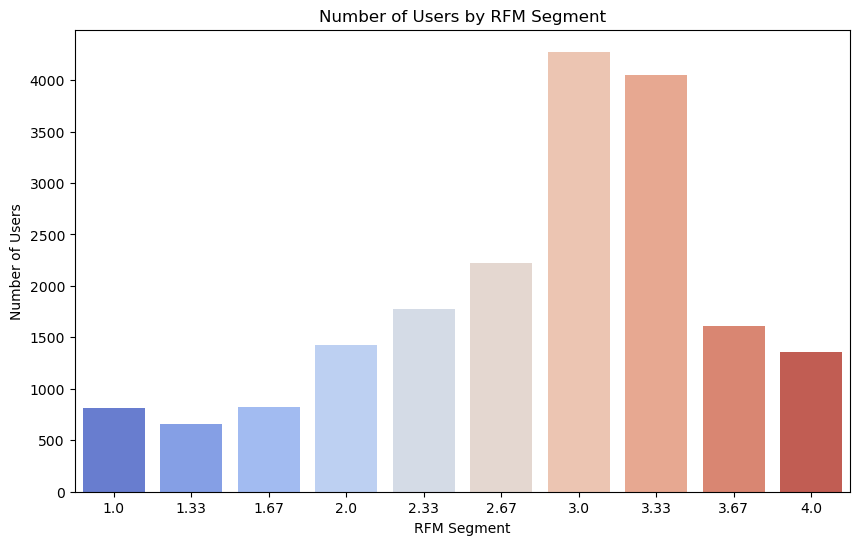

In [77]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rfm_segment', data=rfm, palette='coolwarm')
plt.title('Number of Users by RFM Segment')
plt.xlabel('RFM Segment')
plt.ylabel('Number of Users')
plt.show()


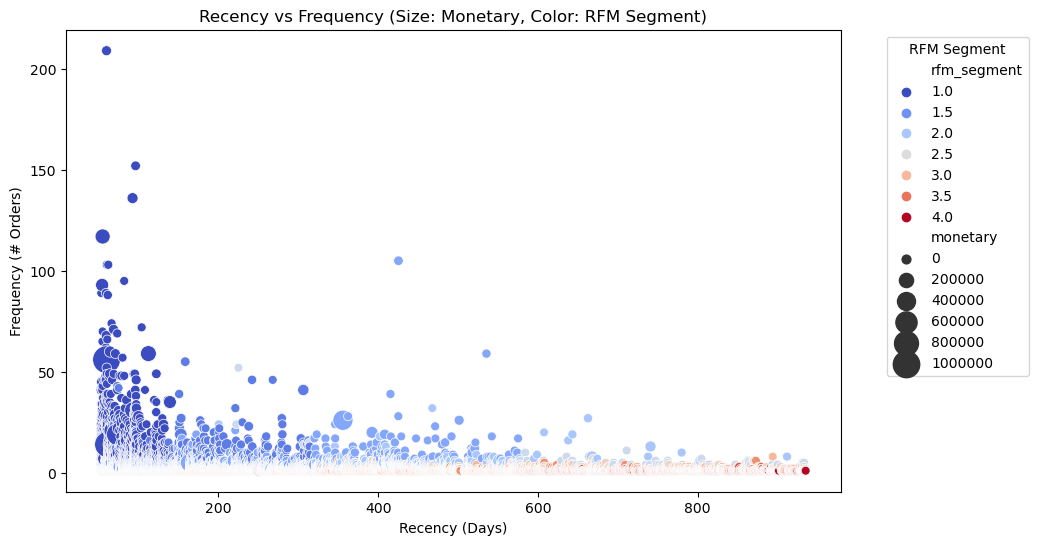

In [79]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='recency', y='frequency', size='monetary', hue='rfm_segment', palette='coolwarm', sizes=(40, 400))
plt.title('Recency vs Frequency (Size: Monetary, Color: RFM Segment)')
plt.xlabel('Recency (Days)')
plt.ylabel('Frequency (# Orders)')
plt.legend(title='RFM Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

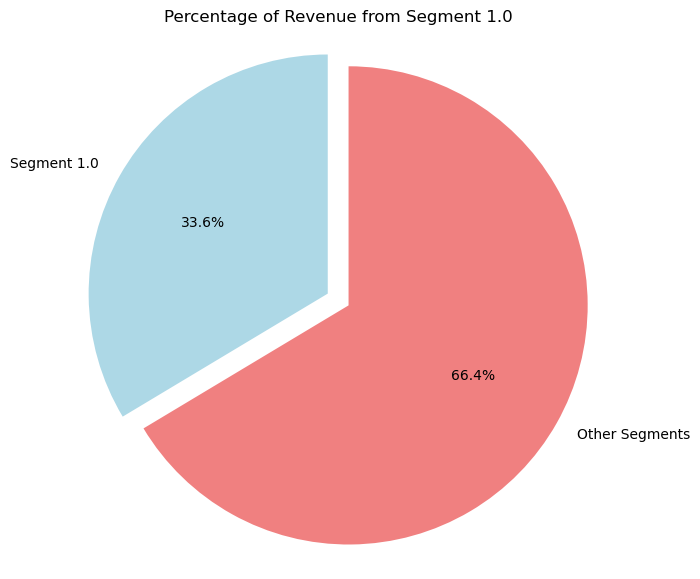

In [81]:
# Считаем общий доход и доход сегмента 1.0
total_monetary = rfm['monetary'].sum()
segment_1_monetary = rfm[rfm['rfm_segment'] == 1.0]['monetary'].sum()

# Процент дохода сегмента 1.0
segment_1_percentage = (segment_1_monetary / total_monetary) * 100

# Данные для круговой диаграммы
labels = ['Segment 1.0', 'Other Segments']
sizes = [segment_1_percentage, 100 - segment_1_percentage]
colors = ['lightblue', 'lightcoral']

# Построение круговой диаграммы
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=(0.1, 0)) 
plt.title('Percentage of Revenue from Segment 1.0')
plt.axis('equal')  # Чтобы сделать круг
plt.show()

Сразу виден перекос в сторону идеальных клиентов - 800 человек формируют около 34% всей выручки. Позже продемонстрирую это на дашборде с более удобными для восприятия группами.

### Когортный анализ 

In [86]:
cohort_query = '''
WITH cohort AS (
    -- Определяем первую активность каждого пользователя (когорта)
    SELECT
        CustomerActionCustomerIdsMindboxId AS user_id,
        MIN(strftime('%Y-%m', CustomerActionDateTimeUtc)) AS cohort_month
    FROM actions
    GROUP BY CustomerActionCustomerIdsMindboxId
),
activity AS (
    -- Определяем активности пользователей по месяцам
    SELECT
        CustomerActionCustomerIdsMindboxId AS user_id,
        strftime('%Y-%m', CustomerActionDateTimeUtc) AS active_month
    FROM actions
),
cohort_activity AS (
    -- Соединяем когорты с активностями
    SELECT
        c.cohort_month,
        a.active_month,
        COUNT(DISTINCT a.user_id) AS retained_users
    FROM cohort c
    JOIN activity a ON c.user_id = a.user_id
    WHERE a.active_month >= c.cohort_month -- активность должна быть после создания когорты
    AND c.cohort_month >= '2023-01'  -- Фильтруем когорты начиная с января 2023 года
    GROUP BY c.cohort_month, a.active_month
),
total_users AS (
    -- Подсчитываем общее количество пользователей в каждой когорте
    SELECT
        cohort_month,
        COUNT(DISTINCT user_id) AS total_users
    FROM cohort
    WHERE cohort_month >= '2023-01'  -- Фильтруем когорты начиная с января 2023 года
    GROUP BY cohort_month
)
-- Финальный запрос для расчета коэффициента удержания
SELECT
    ca.cohort_month,
    ca.active_month,
    ca.retained_users,
    tu.total_users,
    ROUND((ca.retained_users * 1.0 / tu.total_users) * 100, 2) AS retention_rate
FROM cohort_activity ca
JOIN total_users tu ON ca.cohort_month = tu.cohort_month
ORDER BY ca.cohort_month, ca.active_month;
'''

In [88]:
cohort = pd.read_sql(cohort_query, con=engine)
cohort.head()

,cohort_month,active_month,retained_users,total_users,retention_rate
0,2023-01,2023-01,515,515,100.00
1,2023-01,2023-02,475,515,92.23
2,2023-01,2023-03,489,515,94.95
3,2023-01,2023-04,485,515,94.17
4,2023-01,2023-05,472,515,91.65


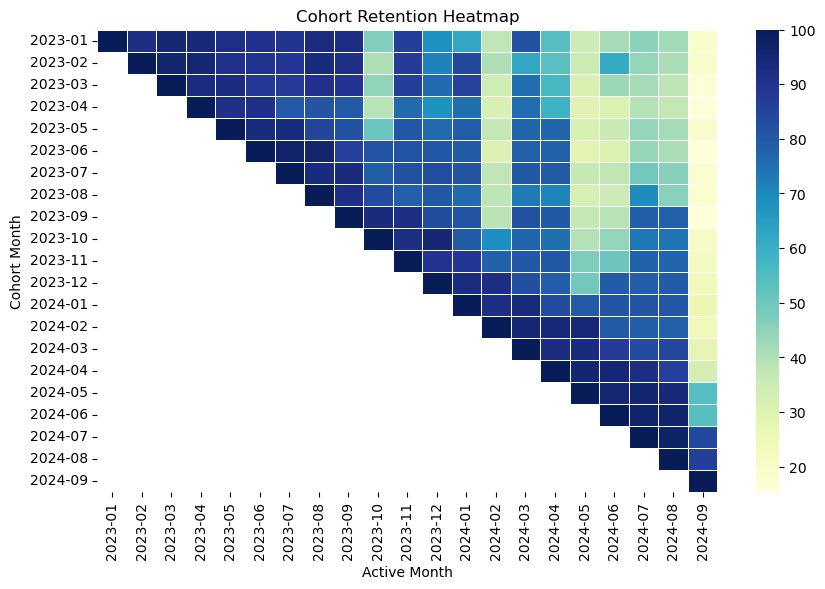

In [100]:
# Преобразуем данные для построения тепловой карты
cohort_pivot = cohort.pivot(index='cohort_month', columns='active_month', values='retention_rate')

# Построение тепловой карты
plt.figure(figsize=(10, 6))
sns.heatmap(cohort_pivot, annot=False, fmt=".1f", cmap="YlGnBu", linewidths=.5)
plt.title('Cohort Retention Heatmap')
plt.ylabel('Cohort Month')
plt.xlabel('Active Month')
plt.show()


Получилась вот такая тепловая карта, для более подробного ознакомления с каждым аспектом анализа предлагаю ознакомится с дашбордом.

## Дашборд в Yandex datalens

Ссылка на дашборд:

https://datalens.yandex/t42mzum02v3kg

**Описание:**
1. На первой странице можно указать фильтры по дате с 21 года и по наличию рекуррентных платежей, что может быть удобно для анализа постоянных жертвователей без подписки. На первой странице указано количество пользователей, сумма пожертвований и количество пожертвований за определенный период у пользователей с/без рекуррентных платежей.
*Древовидная диаграмма* показывает соотношение групп пользователей к другим группам. *Таблица справа* показывает количество пользователей, сумму пожертвований и среднее количество дней, когда они в последний раз делали пожертвование. Дальше можно посмотреть *частоту покупок, количество заказов средний чек и количество собранных средств по группам*. В нижней части дашборда таблица по пользователям - id пользователя и группа к которой он принадлежит - ее можно экспортировать в excel и работать напрямую с жертвователями.
2. На второй странице когортный анализ по метрикам LTV и средний чек. Тут показано распределение значений данных метрик во времени и количество пользователей по когортам.
3. На странице RR показан отток пользователей по когортам и их наибольшая активность через 1, 3 и 6 месяцев. Графики могут выглядеть устрашающе, но лучше поспользоваться таблицой слева и уже на графиках выбрать интересующую когорту.
4. На странице LTV можно увидеть анализ LTV по когортам. На странице указан кумулятивный LTV по когортам, изменение LTV  в течение года по когортам, тепловая карта по активности в течение года и таблица по когортам, которую можно экспортировать.
5. На последней странице AC анализ среднего чека по когортам в течение года. В зависимости от старта когорты можно посмотреть как менялся средний чек в течении года для каждой когорты, соотношение среднего чека к количеству заказов в течение года и тепловую карту среднего чека по когортам.